In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
wheat = pd.read_csv('Seed_Data.csv')

In [87]:
wheat.columns = ['area', 'perimeter', 'compactness', 'length', 'width',
       'asymmetry', 'groove', 'wheat_type']

In [88]:
wheat.head()

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [10]:
wfeatures=['area', 'perimeter', 'compactness', 'length', 'width',
       'asymmetry', 'groove']

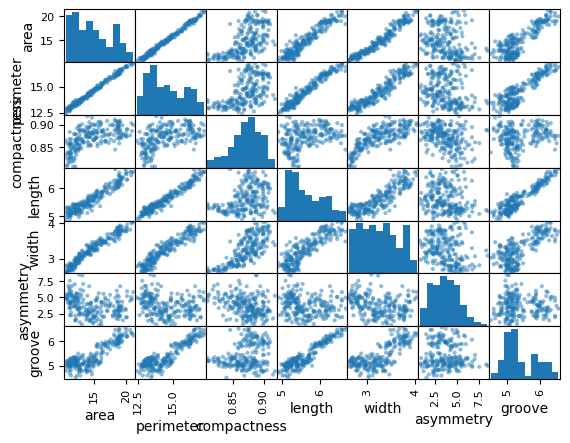

In [12]:
pd.plotting.scatter_matrix(wheat[wfeatures])
plt.show()

In [89]:
X = wheat.loc[:,wfeatures].values

In [90]:
y = wheat.loc[:,['wheat_type']]

In [91]:
X.shape

(210, 7)

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

In [93]:
pca.explained_variance_ratio_

array([0.8293852 , 0.16363245, 0.00565791])

In [94]:
principalComponents.shape

(210, 3)

In [95]:
principalComponents

array([[ 6.63448376e-01, -1.41732098e+00,  4.12356541e-02],
       [ 3.15666512e-01, -2.68922915e+00,  2.31726953e-01],
       [-6.60499302e-01, -1.13150635e+00,  5.27087232e-01],
       [-1.05527590e+00, -1.62119002e+00,  4.37015260e-01],
       [ 1.61999921e+00, -2.18338442e+00,  3.33990920e-01],
       [-4.76938007e-01, -1.33649437e+00,  3.55360614e-01],
       [-1.84834720e-01, -1.50364411e-01,  1.41497264e-01],
       [-7.80629616e-01, -1.12979883e+00,  2.79757608e-01],
       [ 2.28210810e+00, -1.36001690e+00, -3.50729413e-01],
       [ 1.97854147e+00, -1.49468793e+00, -2.93947251e-03],
       [ 3.69122947e-01,  8.86722511e-01,  1.13264978e-01],
       [-7.11021200e-01, -2.10663730e+00,  1.37552595e-01],
       [-1.21370535e+00,  9.46878939e-02,  4.85809237e-01],
       [-1.16908541e+00, -7.42962899e-01,  2.58209340e-01],
       [-1.19272176e+00, -9.53268162e-01,  2.58450639e-01],
       [-5.08171207e-01,  3.77958424e-01,  6.56217572e-01],
       [-1.37469698e+00,  1.32290559e+00

In [26]:
TransformedDf = pd.DataFrame(data = principalComponents,
                             columns = ['pc1', 'pc2','pc3'])

In [27]:
TransformedDf['target'] = y

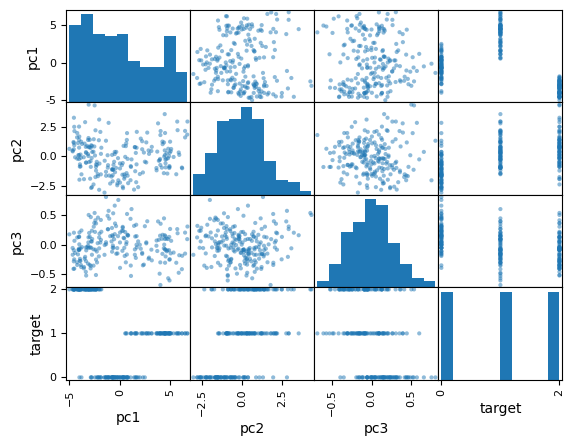

In [28]:
pd.plotting.scatter_matrix(TransformedDf)
plt.show()

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap

In [31]:
import pandas as pd
import numpy as np
data = pd.DataFrame({'x':[20,25,30,40],'y':[4,5,5.5,6]})

In [32]:
data.describe()

,x,y
count,4.000000,4.000000
mean,28.750000,5.125000
std,8.539126,0.853913
min,20.000000,4.000000
25%,23.750000,4.750000
50%,27.500000,5.250000
75%,32.500000,5.625000
max,40.000000,6.000000


<Axes: xlabel='x', ylabel='y'>

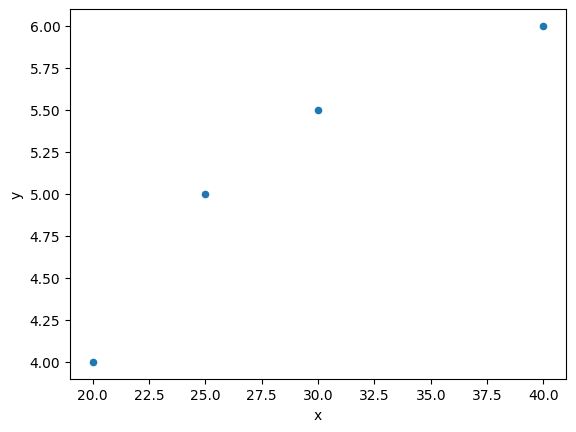

In [33]:
data.plot.scatter('x','y')

In [34]:
st = StandardScaler()

In [35]:
datastd = st.fit_transform(data)

In [36]:
datastd

array([[-1.18321596, -1.52127766],
       [-0.50709255, -0.16903085],
       [ 0.16903085,  0.50709255],
       [ 1.52127766,  1.18321596]])

In [37]:
A = np.cov(datastd,rowvar=False)

In [38]:
A

array([[1.33333333, 1.25714286],
       [1.25714286, 1.33333333]])

In [39]:
import scipy.linalg as la

In [72]:
values, vectors = la.eig(A)

In [73]:
values

array([2.59047619+0.j, 0.07619048+0.j])

In [74]:
vectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [76]:
values[1]/np.sum(values)

(0.028571428571428456+0j)

In [77]:
vectors[1]

array([0.70710678, 0.70710678])

In [78]:
datastd@vectors[1]

array([-1.91236577, -0.47809144,  0.47809144,  1.91236577])

In [81]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(datastd)

In [82]:
pca.components_

array([[-0.70710678, -0.70710678]])

In [83]:
pca.explained_variance_

array([2.59047619])

In [84]:
principalComponents

array([[ 1.91236577],
       [ 0.47809144],
       [-0.47809144],
       [-1.91236577]])